# Снижение размерности матриц текстов

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

Мы будем работать с тем же датасетом, что и в прошлый раз.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

Пока что загрузим только тренировочный сабсет:

In [ ]:
newsgroups = fetch_20newsgroups(subset='train')

In [ ]:
list(newsgroups.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
newsgroups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
len(newsgroups.data)

11314

In [ ]:
len(list(set(newsgroups.target)))

20

In [ ]:
n_features = 1000 # максимальное количество слов в матрице "документы х слова" (= top1000 частотных их всех в корпусе)
n_components = 7 # число тем в корпусе
n_top_words = 20 # порог частотности для визуализаций

Попробуем чуть более продвинутую конфигурацию TfidfVectorizer'а. В частности, ограничим размер словаря (max_features), а также будем игнорировать слишком редкие или слишком частотные слова (max_df и min_df).

Здесь и далее часть кода по https://github.com/nstsj/ML_for_NLP/blob/main/6_dimred/dimred_for_texts(LDA%2BLSA).ipynb.

In [ ]:
tf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, # игнорируем слова,которые только в 5 документах или в 70% документов.
                                max_features=n_features,
                                stop_words='english')

X_tf = tf_vectorizer.fit_transform(newsgroups.data)

In [ ]:
display(X_tf.shape) # матрица "документы x слова"

(11314, 1000)

## Визуализация с t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
X_embedded = TSNE(n_components=2, init='random', perplexity=3).fit_transform(X_tf)

CPU times: user 10min 58s, sys: 419 ms, total: 10min 58s
Wall time: 6min 27s


In [ ]:
X_embedded.shape

(11314, 2)

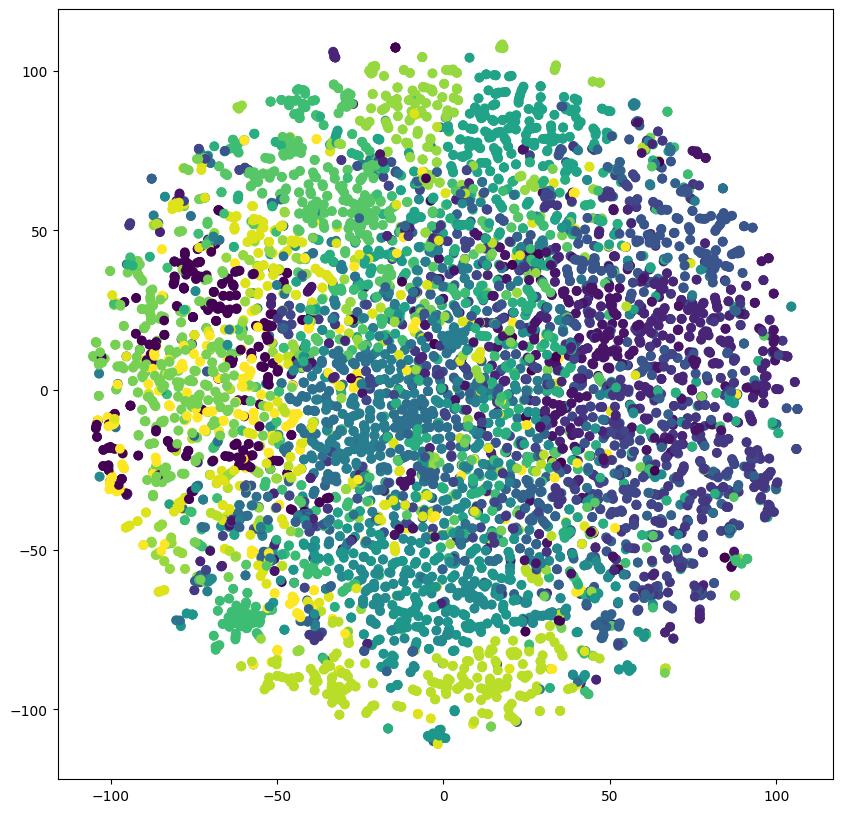

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=newsgroups.target)
plt.show()

In [ ]:
%%time
X_embedded_30 = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X_tf)

CPU times: user 12min 49s, sys: 597 ms, total: 12min 49s
Wall time: 7min 33s


In [ ]:
X_embedded_30.shape

(11314, 2)

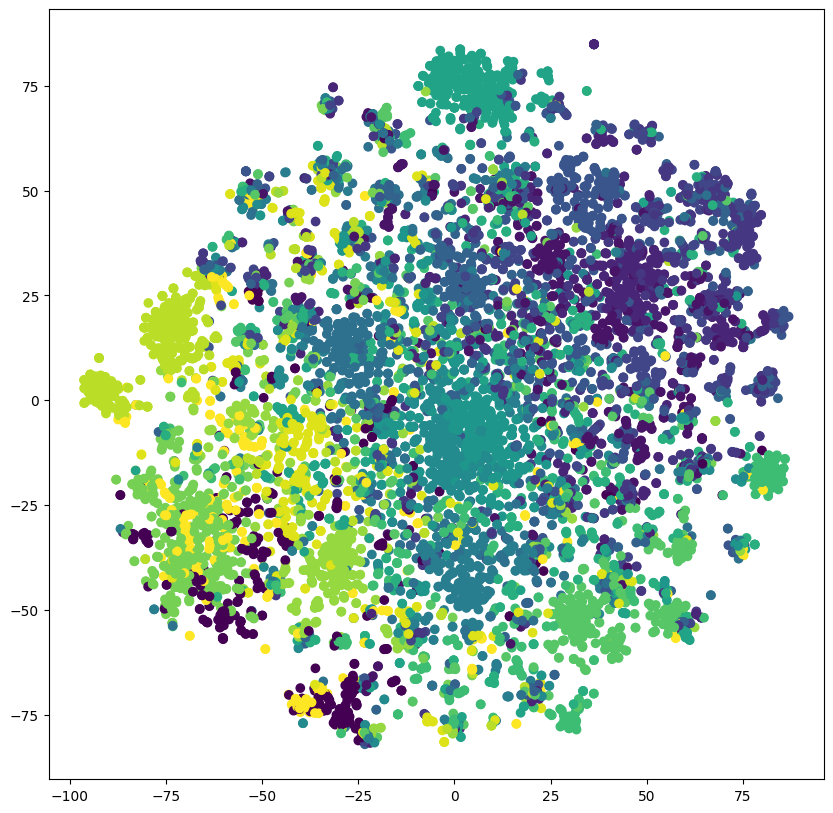

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X_embedded_30[:,0], X_embedded_30[:,1], c=newsgroups.target)
plt.show()

## LSA (Latent Semantic Analysis)

Метод главных компонент в sklearn не работает с разреженными матрицами, поэтому для текстов рекомендуется использовать латентно-семантический анализ при помощи класса TruncatedSVD.

In [ ]:
lsa_model = TruncatedSVD(n_components=100, n_iter=10)

lsa_topic_matrix = lsa_model.fit_transform(X_tf)

In [ ]:
# матрица тем
lsa_topic_matrix.shape

(11314, 100)

Видно, что вторая компонента объясняет больше всего дисперсии (хотя тоже очень мало):

In [ ]:
lsa_model.explained_variance_ratio_

array([0.0036485 , 0.01148966, 0.01066464, 0.00835132, 0.00742669,
       0.00700052, 0.00661221, 0.00649316, 0.00610941, 0.00573713,
       0.00552077, 0.00526359, 0.00498587, 0.00474531, 0.00472057,
       0.00460462, 0.00451089, 0.00428447, 0.00423691, 0.00418552,
       0.0041385 , 0.0040585 , 0.00402749, 0.0039539 , 0.00388502,
       0.00386038, 0.00374661, 0.00373193, 0.00367726, 0.00355032,
       0.00352198, 0.00346939, 0.00340649, 0.00337655, 0.0033527 ,
       0.00327664, 0.00322639, 0.00314745, 0.00309288, 0.0030716 ,
       0.00302495, 0.00300425, 0.00298115, 0.00294785, 0.00293222,
       0.00288807, 0.002864  , 0.0028213 , 0.00280959, 0.00277527,
       0.00274067, 0.00272706, 0.00269047, 0.00267453, 0.00265064,
       0.00262765, 0.00261851, 0.00257387, 0.00256549, 0.00254123,
       0.00250818, 0.00249898, 0.00248926, 0.00247533, 0.00245576,
       0.00244247, 0.00241933, 0.00240108, 0.00238694, 0.00235982,
       0.00234886, 0.00233136, 0.00231084, 0.00230251, 0.00227

Всего 100 компонент объясняют 33% дисперсии:

In [ ]:
np.sum(lsa_model.explained_variance_ratio_)

0.33603724081604625

Дополненный кусочек про просмотр главных слов каждой компоненты, который объясняется ниже:

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, n_components, max_plots=7):

    fig, axes = plt.subplots(1, max_plots, figsize=(25, 10)) # параметры отображения
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем


    for topic_idx, topic in enumerate(model.components_):
      if topic_idx < max_plots:
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # строка для сохранения темы и слов в словарь
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=14)


    plt.show()

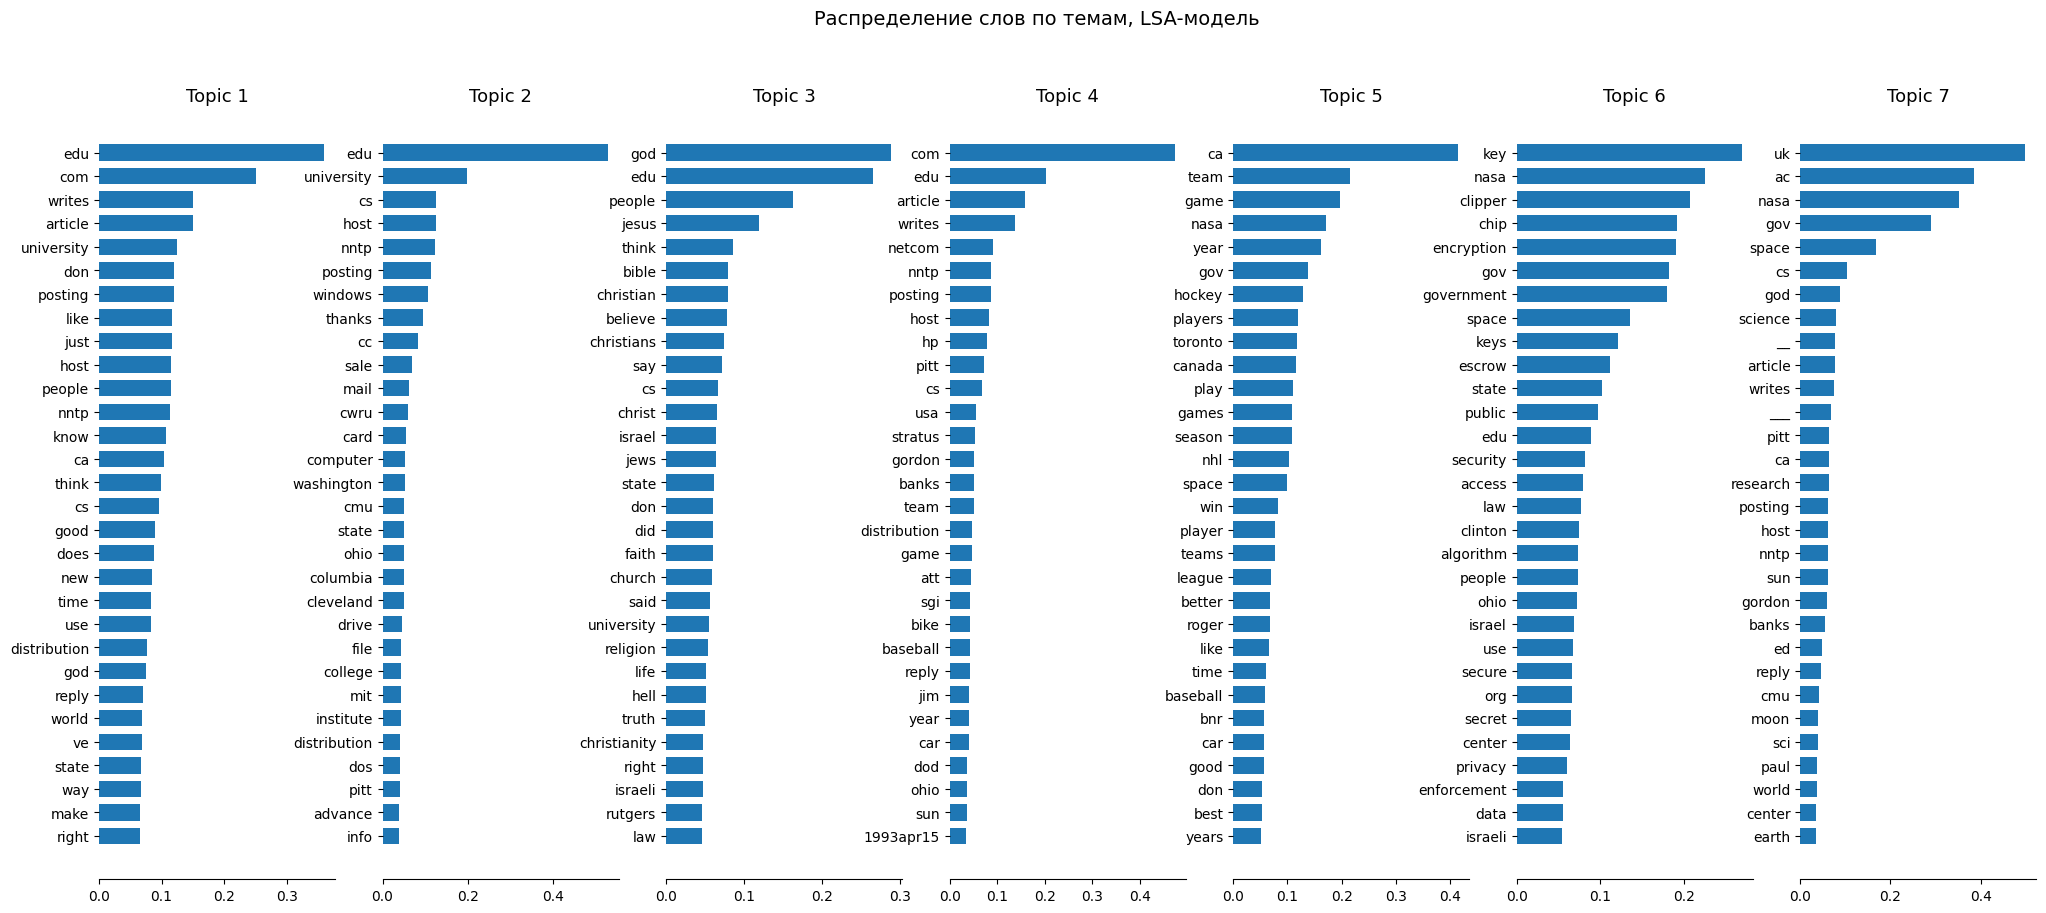

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lsa_model, tf_feature_names, 30, 'Распределение слов по темам, LSA-модель', n_components)

Можно посмотреть, к какому топику принадлежит каждый документ:

In [ ]:
for n in range(10):
    topic_most_pr = lsa_topic_matrix[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 0 topic: 32

doc: 1 topic: 0

doc: 2 topic: 0

doc: 3 topic: 0

doc: 4 topic: 0

doc: 5 topic: 0

doc: 6 topic: 0

doc: 7 topic: 55

doc: 8 topic: 85

doc: 9 topic: 0



## LDA (Latent Dirichlet Allocation)

In [ ]:
lda = LatentDirichletAllocation(n_components=100)

lda.fit(X_tf)

LatentDirichletAllocation(n_components=100)

In [ ]:
# матрица "темы x слова": с какой вероятностью каждая тема генерирует каждое слово в корпусе
lda.components_.shape

(100, 1000)

Можно посмотреть на распределение документов по темам:

In [ ]:
# ряды - id документов, колонки - id топиков, ячейки - вероятность отнесения документа к топику.
doc_topic = lda.transform(X_tf)

In [ ]:
doc_topic.shape

(11314, 100)

In [ ]:
# ряды - id документов, колонки - id топиков, ячейки - вероятность отнесения документа к топику.
pd.DataFrame(doc_topic).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,...,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974,0.001974
1,0.001978,0.419874,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,...,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978,0.001978
2,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,...,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174,0.001174
3,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,...,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395,0.001395
4,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.026127,0.001540,0.001540,0.001540,...,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540


Попробуем посмотреть, какие слова входят в конкретную компоненту.

np.argsort() возвращает индексы для сортировки массива, но в обратном порядке (т.е. слова с самыми большими значениями будут в конце отсортированного массива). Мы возьмем последние N самых значимых слов.

In [ ]:
top_features_ind = lda.components_[0].argsort()[:-n_top_words - 1:-1]

In [ ]:
top_features_ind

array([177, 554, 322, 832, 978, 879, 434, 497, 361, 381, 168, 156, 250,
       303, 262, 331, 341, 340, 339, 338])

Теперь возьмем слова, находящиеся в списке признаков под этими индексами.

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

top_features = [tf_feature_names[i] for i in top_features_ind]

Посмотрим на самые значимые слова и их веса:

In [ ]:
weights = lda.components_[0][top_features_ind]

In [ ]:
print(list(zip(top_features, weights)))

[('brian', 25.713975806161653), ('list', 14.719525419235351), ('discussion', 2.1148023225809482), ('smith', 1.8230419418196417), ('wish', 0.4297859623196638), ('talk', 0.3731939714108454), ('government', 0.331255891651024), ('interested', 0.24933266388958053), ('especially', 0.20819908860810424), ('fax', 0.05530973615975033), ('board', 0.021456785289393064), ('better', 0.010672082820623215), ('community', 0.010048968294397194), ('dept', 0.01000272228061587), ('continue', 0.01), ('don', 0.01), ('earth', 0.01), ('early', 0.01), ('drives', 0.01), ('drivers', 0.01)]


Эти слова и их веса можно отрисовать как бар-чарт:

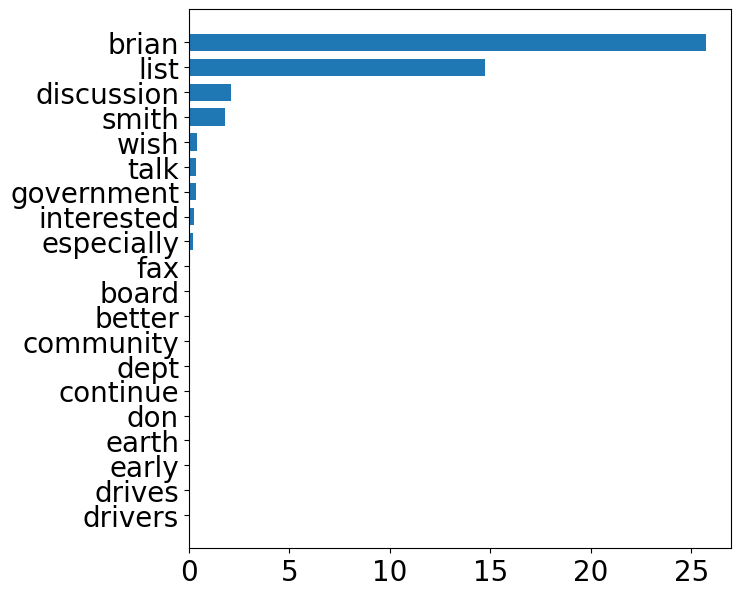

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.barh(top_features, weights, height=0.7)
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)

Такие графики можно отрисовать, например, для первых семи топиков:

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, n_components, max_plots=7):

    fig, axes = plt.subplots(1, max_plots, figsize=(25, 10)) # параметры отображения
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем


    for topic_idx, topic in enumerate(model.components_):
      if topic_idx < max_plots:
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # строка для сохранения темы и слов в словарь
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=14)


    plt.show()

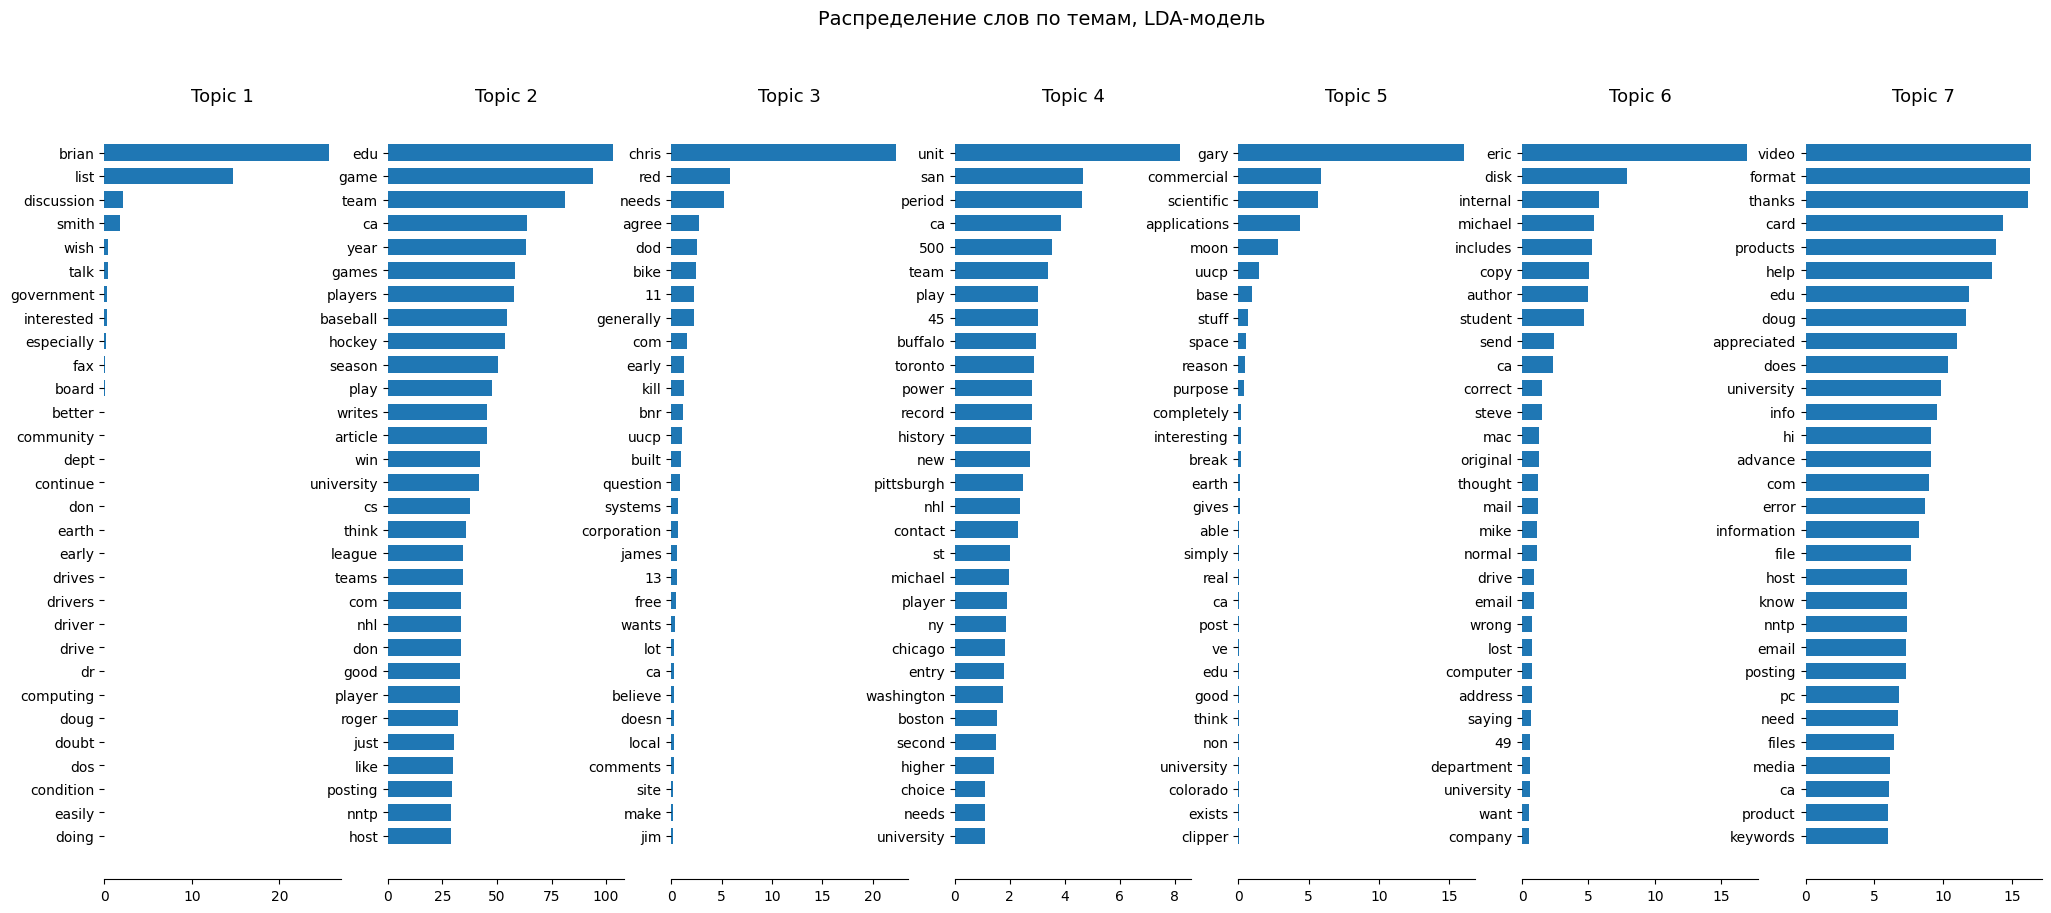

In [ ]:
plot_top_words(lda, tf_feature_names, 30, 'Распределение слов по темам, LDA-модель', n_components)

Можно оценить перплексию и log likelihood модели на тестовых данных.

In [ ]:
test_data = fetch_20newsgroups(subset='test')

In [ ]:
X_test = test_data.data

In [ ]:
y_test = test_data.target

In [ ]:
X_test_vectors = tf_vectorizer.transform(X_test)

In [ ]:
# 1682.2305065520925
lda.perplexity(X_test_vectors)

15609.062929366548

In [ ]:
# -288754.951752731
lda.score(X_test_vectors)

-375356.88200689584

## Использование уменьшенных данных для других задач

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_test_lsa = lsa_model.transform(X_test_vectors)
X_test_lda = lda.transform(X_test_vectors)

In [ ]:
X_train_lsa = lsa_topic_matrix
X_train_lda = doc_topic

In [ ]:
y_train = newsgroups.target

In [ ]:
knn.fit(X_train_lda, y_train)

KNeighborsClassifier()

In [ ]:
knn_preds = knn.predict(X_test_lda)

In [ ]:
print(classification_report(y_test, knn_preds, target_names=newsgroups.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.25      0.35      0.29       319
           comp.graphics       0.21      0.33      0.26       389
 comp.os.ms-windows.misc       0.34      0.35      0.35       394
comp.sys.ibm.pc.hardware       0.29      0.30      0.30       392
   comp.sys.mac.hardware       0.24      0.21      0.23       385
          comp.windows.x       0.36      0.34      0.35       395
            misc.forsale       0.63      0.63      0.63       390
               rec.autos       0.32      0.38      0.34       396
         rec.motorcycles       0.32      0.28      0.30       398
      rec.sport.baseball       0.49      0.55      0.52       397
        rec.sport.hockey       0.54      0.52      0.53       399
               sci.crypt       0.71      0.71      0.71       396
         sci.electronics       0.15      0.10      0.12       393
                 sci.med       0.26      0.15      0.19       396
         

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_2.fit(X_train_lsa, y_train)

KNeighborsClassifier()

In [ ]:
knn_2_preds = knn_2.predict(X_test_lsa)

In [ ]:
print(classification_report(y_test, knn_2_preds, target_names=newsgroups.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.32      0.63      0.42       319
           comp.graphics       0.30      0.44      0.35       389
 comp.os.ms-windows.misc       0.45      0.51      0.48       394
comp.sys.ibm.pc.hardware       0.42      0.45      0.43       392
   comp.sys.mac.hardware       0.48      0.41      0.44       385
          comp.windows.x       0.49      0.42      0.45       395
            misc.forsale       0.54      0.65      0.59       390
               rec.autos       0.50      0.49      0.50       396
         rec.motorcycles       0.60      0.60      0.60       398
      rec.sport.baseball       0.58      0.44      0.50       397
        rec.sport.hockey       0.70      0.69      0.70       399
               sci.crypt       0.82      0.58      0.68       396
         sci.electronics       0.37      0.29      0.32       393
                 sci.med       0.32      0.40      0.35       396
         

In [ ]:
cm = confusion_matrix(y_test, knn_2_preds)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

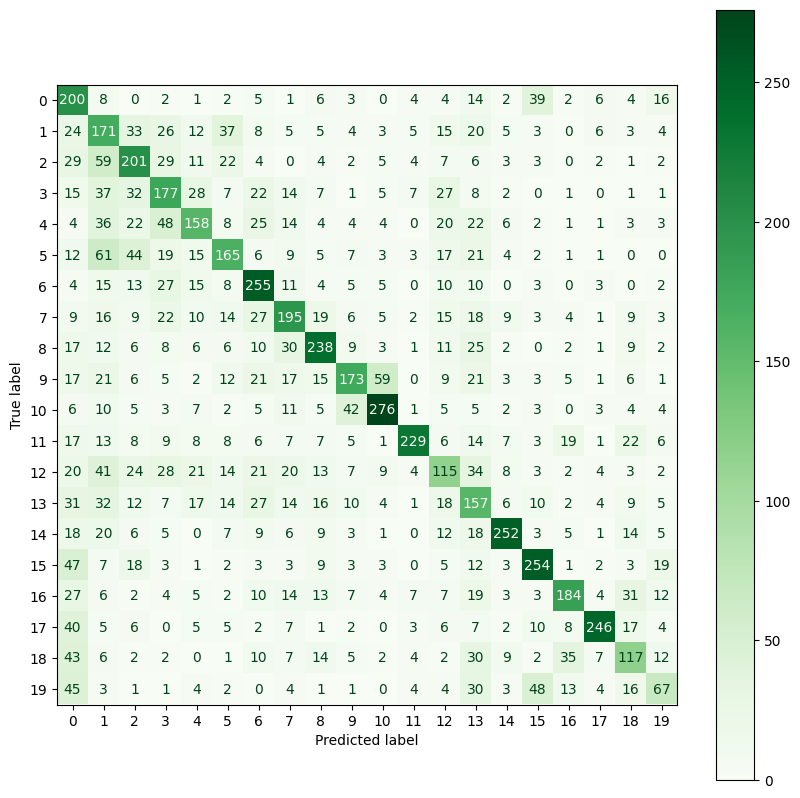

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.show()

In [ ]:
print([(n, topic) for n, topic in enumerate(newsgroups.target_names)])

[(0, 'alt.atheism'), (1, 'comp.graphics'), (2, 'comp.os.ms-windows.misc'), (3, 'comp.sys.ibm.pc.hardware'), (4, 'comp.sys.mac.hardware'), (5, 'comp.windows.x'), (6, 'misc.forsale'), (7, 'rec.autos'), (8, 'rec.motorcycles'), (9, 'rec.sport.baseball'), (10, 'rec.sport.hockey'), (11, 'sci.crypt'), (12, 'sci.electronics'), (13, 'sci.med'), (14, 'sci.space'), (15, 'soc.religion.christian'), (16, 'talk.politics.guns'), (17, 'talk.politics.mideast'), (18, 'talk.politics.misc'), (19, 'talk.religion.misc')]


Посмотрим, побивают ли эти результаты бейзлайн (модель, обученную на полной матрице векторов):

In [ ]:
knn_baseline = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_baseline.fit(X_tf, y_train)

KNeighborsClassifier()

In [ ]:
knn_baseline_preds = knn_baseline.predict(X_test_vectors)

In [ ]:
print(classification_report(y_test, knn_baseline_preds, target_names=newsgroups.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.41      0.55      0.47       319
           comp.graphics       0.32      0.54      0.41       389
 comp.os.ms-windows.misc       0.48      0.59      0.53       394
comp.sys.ibm.pc.hardware       0.38      0.46      0.42       392
   comp.sys.mac.hardware       0.44      0.45      0.44       385
          comp.windows.x       0.48      0.48      0.48       395
            misc.forsale       0.48      0.52      0.50       390
               rec.autos       0.50      0.46      0.48       396
         rec.motorcycles       0.62      0.61      0.62       398
      rec.sport.baseball       0.51      0.50      0.51       397
        rec.sport.hockey       0.63      0.70      0.66       399
               sci.crypt       0.75      0.65      0.70       396
         sci.electronics       0.49      0.33      0.39       393
                 sci.med       0.56      0.35      0.43       396
         